# Heart Disease Prediction using Machine Learning

This project builds machine learning models to predict whether a person is at risk of heart disease based on medical attributes.
Two classification models are trained and compared:
- Logistic Regression
- Decision Tree Classifier


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


## Load Dataset
The dataset is loaded from a local CSV file downloaded from Kaggle.


In [27]:
df = pd.read_csv("heart.csv")

print(df.shape)
df.head()

(1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


## Dataset Overview

Inspect dataset structure, data types, and missing values.


In [31]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

## Data Preprocessing

Categorical features are converted into numerical format using one-hot encoding
to make the dataset suitable for machine learning models.


In [32]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,70,145,174,125,2.6,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
3,61,148,203,161,0.0,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


## Feature Correlation Analysis

Visualize correlations between numerical features after encoding.


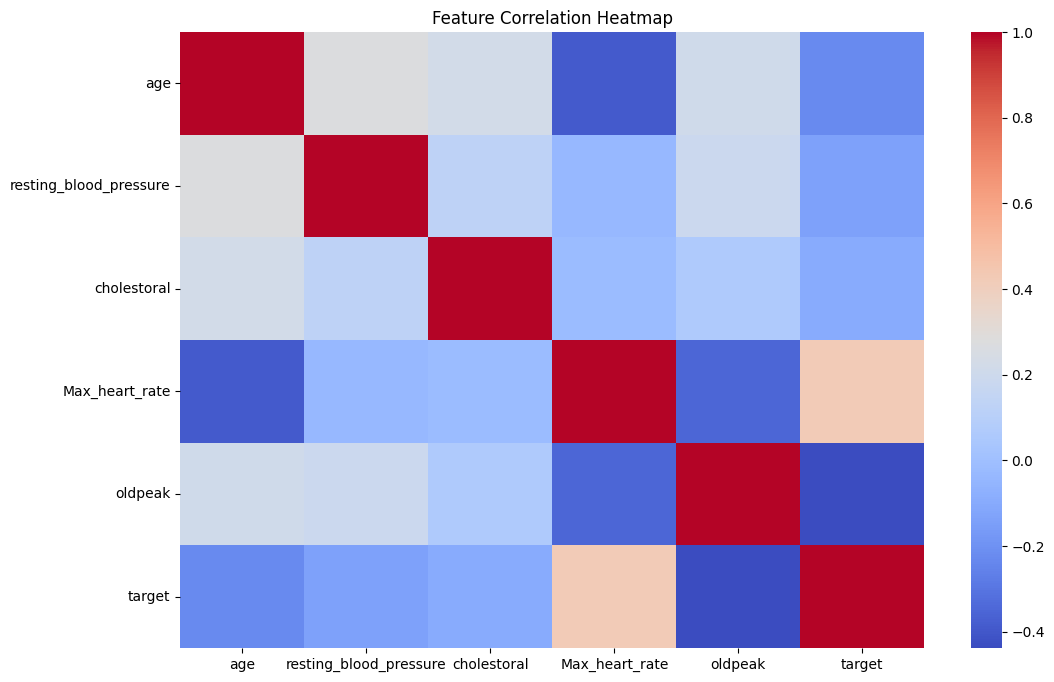

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(),
            cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Train-Test Split

The dataset is split into training and testing sets.


In [37]:
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Feature Scaling

Standardization is applied for Logistic Regression.
Decision Tree does not require scaling.


In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Model

In [39]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

## Decision Tree Classifier

In [40]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]


## Model Evaluation

Models are evaluated using:
- Accuracy
- Confusion Matrix
- ROC-AUC Score

In [42]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nLogistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob_dt))


Logistic Regression Accuracy: 0.7951219512195122
Decision Tree Accuracy: 0.9853658536585366

Logistic Regression ROC-AUC: 0.9020559680182753
Decision Tree ROC-AUC: 0.9854368932038835


## Confusion Matrices


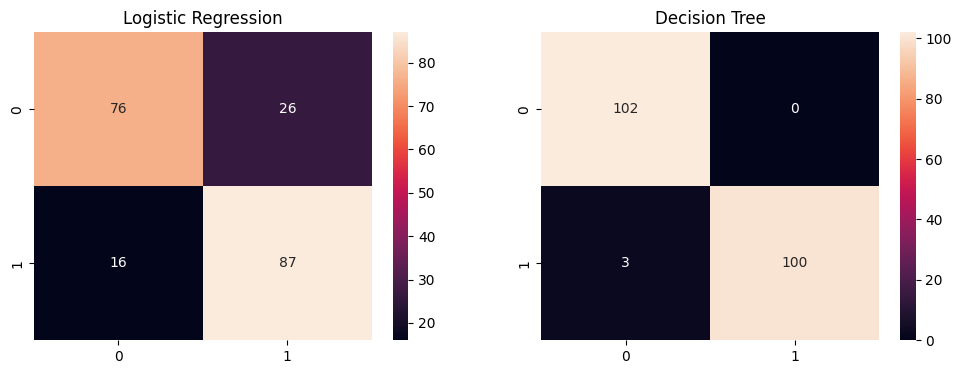

In [43]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d")
plt.title("Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d")
plt.title("Decision Tree")

plt.show()

## ROC Curve Comparison


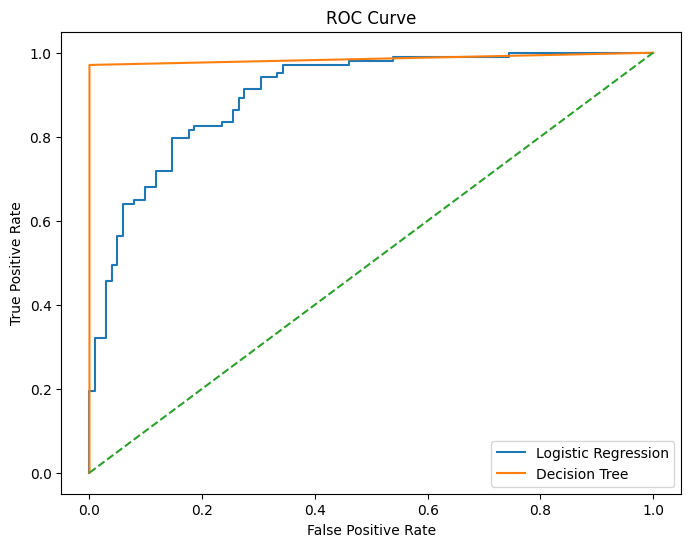

In [44]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Feature Importance (Decision Tree)


In [45]:
feature_importance = pd.Series(
    dt.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


chest_pain_type_Typical angina        0.274524
thalassemia_Reversable Defect         0.131987
vessels_colored_by_flourosopy_Zero    0.110530
oldpeak                               0.089716
Max_heart_rate                        0.073267
slope_Flat                            0.050531
age                                   0.050490
cholestoral                           0.047636
resting_blood_pressure                0.038742
sex_Male                              0.026434
dtype: float64

## Final Insights & Conclusion

- Logistic Regression provides stable and interpretable results
- Decision Tree captures non-linear patterns but risks overfitting
- Features such as age, cholesterol, exercise-induced angina, and ST slope
  significantly impact heart disease prediction
- This project demonstrates a complete medical ML classification pipeline
